In [1]:
# !pip install tensorflow-gpu==2.0.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
import tensorflow as tf


In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

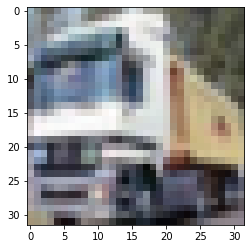

In [6]:
plt.imshow(X_train[1])

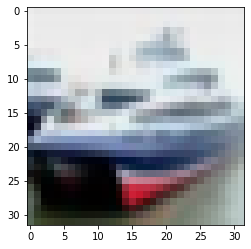

In [7]:
plt.imshow(X_test[1])

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
X_train.max()

255

**Now bringing the value of X_train to range of 1**

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

**Reshaping and making the shape suitable for Convolutional networks with 4 parameters**

In [13]:
# X_train = X_train.reshape(60000,28,28,1)
# X_test = X_test.reshape(10000,28,28,1)

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
input_shape = X_train[0].shape

In [16]:
X_train[0].shape

(32, 32, 3)

**Build CNN**

In [17]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

**Compile Model**

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Train Model**

In [20]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10,verbose= 1,validation_data=(X_test,y_test))

Epoch 1/10
391/391 [==============================] - 154s 393ms/step - loss: 1.6166 - accuracy: 0.4033 - val_loss: 1.5914 - val_accuracy: 0.5030
Epoch 2/10
391/391 [==============================] - 155s 398ms/step - loss: 1.2216 - accuracy: 0.5644 - val_loss: 1.1066 - val_accuracy: 0.6032
Epoch 3/10
391/391 [==============================] - 156s 398ms/step - loss: 1.0602 - accuracy: 0.6267 - val_loss: 0.9947 - val_accuracy: 0.6500
Epoch 4/10
391/391 [==============================] - 155s 398ms/step - loss: 0.9654 - accuracy: 0.6606 - val_loss: 0.9557 - val_accuracy: 0.6607
Epoch 5/10
391/391 [==============================] - 155s 397ms/step - loss: 0.9156 - accuracy: 0.6785 - val_loss: 0.8182 - val_accuracy: 0.7115
Epoch 6/10
391/391 [==============================] - 155s 397ms/step - loss: 0.8732 - accuracy: 0.6934 - val_loss: 0.8318 - val_accuracy: 0.7059
Epoch 7/10
391/391 [==============================] - 156s 399ms/step - loss: 0.8269 - accuracy: 0.7110 - val_loss: 0.9132 -

In [21]:
 model.evaluate(X_test,y_test)

313/313 [==============================] - 8s 27ms/step - loss: 0.7608 - accuracy: 0.7377


[0.7608122825622559, 0.7376999855041504]

**Learning Curve**

In [22]:
def learning(history,epochs):
  epochs_range = range(1,epochs+1)
  plt.plot(epochs_range,history.history['accuracy'])
  plt.plot(epochs_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

  plt.plot(epochs_range,history.history['loss'])
  plt.plot(epochs_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

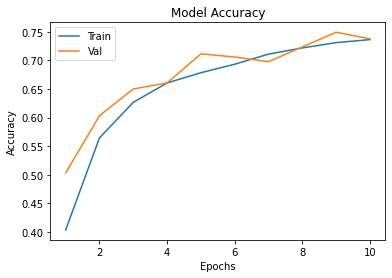

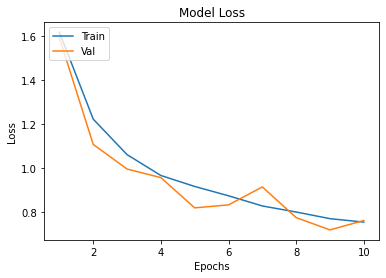

In [23]:
learning(history,10)

**Confusion Matrix**

In [35]:
class_name = {
    0 :'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'}

In [25]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
pip install mlxtend==0.17.0


     |████████████████████████████████| 1.3MB 3.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [27]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib

In [28]:
mat = confusion_matrix(y_test,y_pred)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efe7b94a080>)

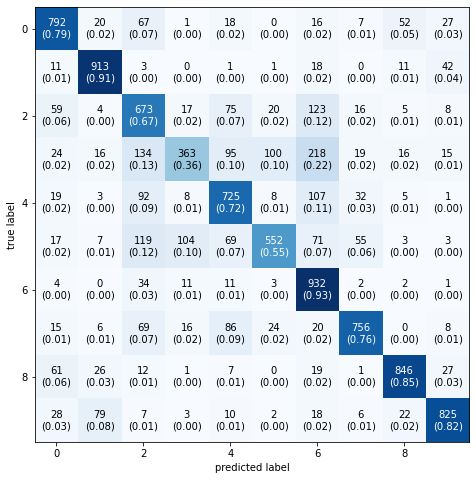

In [29]:
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),show_normed=True)

**Prediction**

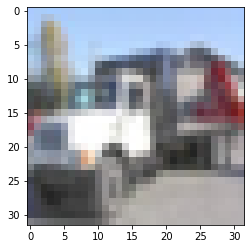

In [30]:
plt.imshow(X_test[45])

In [31]:
pred = model.predict(X_test)

In [32]:
np.argmax(pred[45])

9

In [36]:
print(class_name.get(np.argmax(pred[45])))

truck
